# 1st Assginment 
November 7, 2022

## Exercise 2

### Loading Dataset

In [ ]:
import torch
from collections import OrderedDict
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch import optim
import numpy as np
%matplotlib inline
torch.manual_seed(101)

In [ ]:
transform = transforms.ToTensor()

In [ ]:
trainset = torchvision.datasets.FashionMNIST('~/.pytorch/MNIST_data/', train=True, transform=transform, download=True)
trainset

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch/MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
testset = torchvision.datasets.FashionMNIST('~/.pytorch/MNIST_data/', train=False, transform=transform, download=True)
testset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /root/.pytorch/MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()

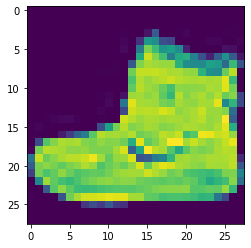

In [ ]:
img, lbl = trainset[0]
plt.imshow(img.reshape((28,28)))

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=500, shuffle=True)


In [ ]:
print(trainloader.dataset.train_data.shape)
print(testloader.dataset.test_data.shape)


torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [ ]:
input_size = trainloader.dataset.train_data.shape[1] * trainloader.dataset.train_data.shape[2]
output_size = 10

### A) The effect of different hidden layers


#### 1) 1 hidden layer

In [ ]:
hidden_layers_1 = [80]

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers_1[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers_1[0], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=80, bias=True)
  (1): ReLU()
  (2): Linear(in_features=80, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses_1 = []
test_losses_1 = []
train_correct_1 = []
test_correct_1 = []
for e in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for x_train, y_train in trainloader:
        y_pred = model(x_train.view(x_train.shape[0], -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    train_losses_1.append(loss)
    train_correct_1.append(trn_corr)

    print(f"epoch {e+1}:")    
    print(f"Train loss: {train_losses_1[-1].item():10.8f}, Train accuracy: {train_correct_1[-1].item()/600:.3f}%")

    with torch.no_grad():
        for x_test, y_test in testloader:
            y_val = model(x_test.view(x_test.shape[0], -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses_1.append(loss)
    test_correct_1.append(tst_corr)
    print(f"Test loss: {test_losses_1[-1].item():10.8f}, Test accuracy: {test_correct_1[-1].item()/100:.3f}%")

epoch 1:
Train loss: 0.36897281, Train accuracy: 79.778%
Test loss: 0.53398150, Test accuracy: 82.970%
epoch 2:
Train loss: 0.32984689, Train accuracy: 85.295%
Test loss: 0.44292355, Test accuracy: 85.140%
epoch 3:
Train loss: 0.33915702, Train accuracy: 86.552%
Test loss: 0.42073894, Test accuracy: 85.600%
epoch 4:
Train loss: 0.28992972, Train accuracy: 87.308%
Test loss: 0.35143018, Test accuracy: 86.410%
epoch 5:
Train loss: 0.33270881, Train accuracy: 88.025%
Test loss: 0.37708926, Test accuracy: 86.970%
epoch 6:
Train loss: 0.48304173, Train accuracy: 88.528%
Test loss: 0.44913384, Test accuracy: 85.580%
epoch 7:
Train loss: 0.26390827, Train accuracy: 88.913%
Test loss: 0.32953289, Test accuracy: 86.780%
epoch 8:
Train loss: 0.25477442, Train accuracy: 89.120%
Test loss: 0.33709067, Test accuracy: 87.230%
epoch 9:
Train loss: 0.24408440, Train accuracy: 89.545%
Test loss: 0.35516199, Test accuracy: 87.360%
epoch 10:
Train loss: 0.31910804, Train accuracy: 89.828%
Test loss: 0.38

#### 2) 3 hidden layers

In [ ]:
hidden_layers_3 = [180, 120, 60]

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers_3[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers_3[0], hidden_layers_3[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers_3[1], hidden_layers_3[2]),
    nn.ReLU(),
    nn.Linear(hidden_layers_3[2], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=180, bias=True)
  (1): ReLU()
  (2): Linear(in_features=180, out_features=120, bias=True)
  (3): ReLU()
  (4): Linear(in_features=120, out_features=60, bias=True)
  (5): ReLU()
  (6): Linear(in_features=60, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses_3 = []
test_losses_3 = []
train_correct_3 = []
test_correct_3 = []
for e in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for x_train, y_train in trainloader:
        y_pred = model(x_train.view(x_train.shape[0], -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    train_losses_3.append(loss)
    train_correct_3.append(trn_corr)

    print(f"epoch {e+1}:")    
    print(f"Train loss: {train_losses_3[-1].item():10.8f}, Train accuracy: {train_correct_3[-1].item()/600:.3f}%")

    with torch.no_grad():
        for x_test, y_test in testloader:
            y_val = model(x_test.view(x_test.shape[0], -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses_3.append(loss)
    test_correct_3.append(tst_corr)
    print(f"Test loss: {test_losses_3[-1].item():10.8f}, Test accuracy: {test_correct_3[-1].item()/100:.3f}%")

epoch 1:
Train loss: 0.47073245, Train accuracy: 78.532%
Test loss: 0.49954468, Test accuracy: 82.670%
epoch 2:
Train loss: 0.44456518, Train accuracy: 85.803%
Test loss: 0.35438660, Test accuracy: 84.860%
epoch 3:
Train loss: 0.42037022, Train accuracy: 87.145%
Test loss: 0.35262835, Test accuracy: 86.140%
epoch 4:
Train loss: 0.27638173, Train accuracy: 87.987%
Test loss: 0.42004120, Test accuracy: 86.290%
epoch 5:
Train loss: 0.24862392, Train accuracy: 88.718%
Test loss: 0.32620305, Test accuracy: 86.270%
epoch 6:
Train loss: 0.32978794, Train accuracy: 89.205%
Test loss: 0.40204030, Test accuracy: 87.750%
epoch 7:
Train loss: 0.17772159, Train accuracy: 89.807%
Test loss: 0.36389658, Test accuracy: 87.570%
epoch 8:
Train loss: 0.24595585, Train accuracy: 90.010%
Test loss: 0.35267431, Test accuracy: 87.580%
epoch 9:
Train loss: 0.20328863, Train accuracy: 90.533%
Test loss: 0.33064154, Test accuracy: 88.070%
epoch 10:
Train loss: 0.24697308, Train accuracy: 90.843%
Test loss: 0.28

#### 3) 5 hidden layers

In [ ]:
hidden_layers_5 = [300, 240, 180, 120, 60]

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers_5[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers_5[0], hidden_layers_5[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers_5[1], hidden_layers_5[2]),
    nn.ReLU(),
    nn.Linear(hidden_layers_5[2], hidden_layers_5[3]),
    nn.ReLU(),
    nn.Linear(hidden_layers_5[3], hidden_layers_5[4]),
    nn.ReLU(),
    nn.Linear(hidden_layers_5[4], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=240, bias=True)
  (3): ReLU()
  (4): Linear(in_features=240, out_features=180, bias=True)
  (5): ReLU()
  (6): Linear(in_features=180, out_features=120, bias=True)
  (7): ReLU()
  (8): Linear(in_features=120, out_features=60, bias=True)
  (9): ReLU()
  (10): Linear(in_features=60, out_features=10, bias=True)
  (11): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses_5 = []
test_losses_5 = []
train_correct_5 = []
test_correct_5 = []
for e in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for x_train, y_train in trainloader:
        y_pred = model(x_train.view(x_train.shape[0], -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    train_losses_5.append(loss)
    train_correct_5.append(trn_corr)

    print(f"epoch {e+1}:")    
    print(f"Train loss: {train_losses_5[-1].item():10.8f}, Train accuracy: {train_correct_5[-1].item()/600:.3f}%")

    with torch.no_grad():
        for x_test, y_test in testloader:
            y_val = model(x_test.view(x_test.shape[0], -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses_5.append(loss)
    test_correct_5.append(tst_corr)
    print(f"Test loss: {test_losses_5[-1].item():10.8f}, Test accuracy: {test_correct_5[-1].item()/100:.3f}%")

epoch 1:
Train loss: 0.34533826, Train accuracy: 75.677%
Test loss: 0.34557486, Test accuracy: 83.190%
epoch 2:
Train loss: 0.38401273, Train accuracy: 84.853%
Test loss: 0.41573858, Test accuracy: 84.330%
epoch 3:
Train loss: 0.30247808, Train accuracy: 86.683%
Test loss: 0.37938929, Test accuracy: 84.690%
epoch 4:
Train loss: 0.33037177, Train accuracy: 87.857%
Test loss: 0.36168656, Test accuracy: 87.260%
epoch 5:
Train loss: 0.39935279, Train accuracy: 88.402%
Test loss: 0.44976044, Test accuracy: 85.230%
epoch 6:
Train loss: 0.27857745, Train accuracy: 89.113%
Test loss: 0.33790576, Test accuracy: 87.080%
epoch 7:
Train loss: 0.33803600, Train accuracy: 89.682%
Test loss: 0.33545560, Test accuracy: 87.100%
epoch 8:
Train loss: 0.25329074, Train accuracy: 90.055%
Test loss: 0.40479156, Test accuracy: 87.650%
epoch 9:
Train loss: 0.25663373, Train accuracy: 90.218%
Test loss: 0.37413478, Test accuracy: 87.750%
epoch 10:
Train loss: 0.30265927, Train accuracy: 90.758%
Test loss: 0.35

#### Comparing models

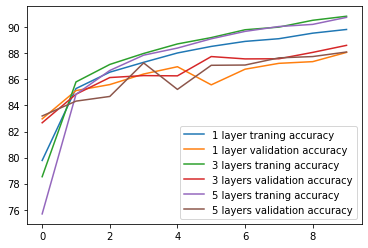

In [ ]:
plt.plot([t/600 for t in train_correct_1], label='1 layer traning accuracy')
plt.plot([t/100 for t in test_correct_1], label='1 layer validation accuracy')
plt.plot([t/600 for t in train_correct_3], label='3 layers traning accuracy')
plt.plot([t/100 for t in test_correct_3], label='3 layers validation accuracy')
plt.plot([t/600 for t in train_correct_5], label='5 layers traning accuracy')
plt.plot([t/100 for t in test_correct_5], label='5 layers validation accuracy')
plt.legend()

### B) Using Dropot method

In [ ]:
hidden_layers = [180, 120, 60]

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(hidden_layers[0], hidden_layers[1]),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(hidden_layers[1], hidden_layers[2]),
    nn.Dropout(p=0.25),
    nn.ReLU(),
    nn.Linear(hidden_layers[2], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=180, bias=True)
  (1): Dropout(p=0.25, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=180, out_features=120, bias=True)
  (4): Dropout(p=0.25, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=120, out_features=60, bias=True)
  (7): Dropout(p=0.25, inplace=False)
  (8): ReLU()
  (9): Linear(in_features=60, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for e in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for x_train, y_train in trainloader:
        y_pred = model(x_train.view(x_train.shape[0], -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    train_correct.append(trn_corr)

    print(f"epoch {e+1}:")    
    print(f"Train loss: {train_losses[-1].item():10.8f}, Train accuracy: {train_correct[-1].item()/600:.3f}%")

    with torch.no_grad():
        for x_test, y_test in testloader:
            y_val = model(x_test.view(x_test.shape[0], -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    print(f"Test loss: {test_losses[-1].item():10.8f}, Test accuracy: {test_correct[-1].item()/100:.3f}%")

epoch 1:
Train loss: 0.44851798, Train accuracy: 73.587%
Test loss: 0.52109396, Test accuracy: 80.970%
epoch 2:
Train loss: 0.44706997, Train accuracy: 83.737%
Test loss: 0.50805664, Test accuracy: 83.640%
epoch 3:
Train loss: 0.50803638, Train accuracy: 85.208%
Test loss: 0.50898063, Test accuracy: 84.530%
epoch 4:
Train loss: 0.42607066, Train accuracy: 86.217%
Test loss: 0.43795782, Test accuracy: 84.330%
epoch 5:
Train loss: 0.53436911, Train accuracy: 86.653%
Test loss: 0.43410692, Test accuracy: 85.440%
epoch 6:
Train loss: 0.42889687, Train accuracy: 87.228%
Test loss: 0.44496340, Test accuracy: 85.720%
epoch 7:
Train loss: 0.38468629, Train accuracy: 87.563%
Test loss: 0.37865743, Test accuracy: 86.370%
epoch 8:
Train loss: 0.39146084, Train accuracy: 87.915%
Test loss: 0.36763194, Test accuracy: 86.420%
epoch 9:
Train loss: 0.32894817, Train accuracy: 88.163%
Test loss: 0.38844419, Test accuracy: 86.740%
epoch 10:
Train loss: 0.26653674, Train accuracy: 88.305%
Test loss: 0.38

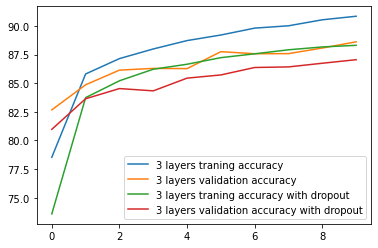

In [ ]:
plt.plot([t/600 for t in train_correct_3], label='3 layers traning accuracy')
plt.plot([t/100 for t in test_correct_3], label='3 layers validation accuracy')
plt.plot([t/600 for t in train_correct], label='3 layers traning accuracy with dropout')
plt.plot([t/100 for t in test_correct], label='3 layers validation accuracy with dropout')
plt.legend()

### C) Early Stopping

from [github](https://github.com/Bjarten/early-stopping-pytorch/blob/master/pytorchtools.py)



In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
hidden_layers = [180, 120, 60]

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers[0], hidden_layers[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers[1], hidden_layers[2]),
    nn.ReLU(),
    nn.Linear(hidden_layers[2], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=180, bias=True)
  (1): ReLU()
  (2): Linear(in_features=180, out_features=120, bias=True)
  (3): ReLU()
  (4): Linear(in_features=120, out_features=60, bias=True)
  (5): ReLU()
  (6): Linear(in_features=60, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
early_stopping = EarlyStopping(patience=5, verbose=True)

In [ ]:
epochs = 25
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for e in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for x_train, y_train in trainloader:
        y_pred = model(x_train.view(x_train.shape[0], -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    train_correct.append(trn_corr)

    print(f"epoch {e}:")    
    print(f"Train loss: {train_losses[-1].item():10.8f}, Train accuracy: {train_correct[-1].item()/600:.3f}%")

    with torch.no_grad():
        for x_test, y_test in testloader:
            y_val = model(x_test.view(x_test.shape[0], -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)
    print(f"Test loss: {test_losses[-1]:10.8f}, Test accuracy: {test_correct[-1]/100:.3f}%")

    test_loss = np.average(test_losses)
    early_stopping(test_loss, model)
        
    if early_stopping.early_stop:
        print("Early stopping")
        break

epoch 0:
Train loss: 0.38619816, Train accuracy: 77.980%
Test loss: 0.43622357, Test accuracy: 83.800%
Validation loss decreased (inf --> 0.436224).  Saving model ...
epoch 1:
Train loss: 0.25686991, Train accuracy: 85.517%
Test loss: 0.40732920, Test accuracy: 84.920%
Validation loss decreased (0.436224 --> 0.421776).  Saving model ...
epoch 2:
Train loss: 0.24844140, Train accuracy: 86.935%
Test loss: 0.43211615, Test accuracy: 85.740%
EarlyStopping counter: 1 out of 5
epoch 3:
Train loss: 0.39125064, Train accuracy: 88.052%
Test loss: 0.40442434, Test accuracy: 85.100%
Validation loss decreased (0.421776 --> 0.420023).  Saving model ...
epoch 4:
Train loss: 0.22247702, Train accuracy: 88.563%
Test loss: 0.32212332, Test accuracy: 87.240%
Validation loss decreased (0.420023 --> 0.400443).  Saving model ...
epoch 5:
Train loss: 0.18813394, Train accuracy: 89.185%
Test loss: 0.41567793, Test accuracy: 87.560%
EarlyStopping counter: 1 out of 5
epoch 6:
Train loss: 0.25446415, Train accu

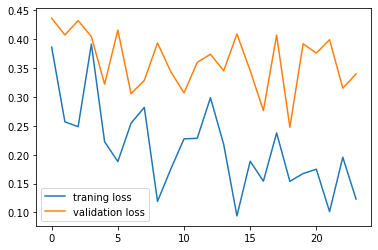

In [ ]:
plt.plot([t.item() for t in train_losses], label='traning loss')
plt.plot([t for t in test_losses], label='validation loss')
plt.legend()

### D) Batch Normalization

In [ ]:
hidden_layers = [180, 120, 60]

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    nn.BatchNorm1d(hidden_layers[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers[0], hidden_layers[1]),
    nn.BatchNorm1d(hidden_layers[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers[1], hidden_layers[2]),
    nn.BatchNorm1d(hidden_layers[2]),
    nn.ReLU(),
    nn.Linear(hidden_layers[2], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=180, bias=True)
  (1): BatchNorm1d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=180, out_features=120, bias=True)
  (4): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Linear(in_features=120, out_features=60, bias=True)
  (7): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU()
  (9): Linear(in_features=60, out_features=10, bias=True)
  (10): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []
for e in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for x_train, y_train in trainloader:
        y_pred = model(x_train.view(x_train.shape[0], -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    train_correct.append(trn_corr)

    print(f"epoch {e+1}:")    
    print(f"Train loss: {train_losses[-1].item():10.8f}, Train accuracy: {train_correct[-1].item()/600:.3f}%")

    with torch.no_grad():
        for x_test, y_test in testloader:
            y_val = model(x_test.view(x_test.shape[0], -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    print(f"Test loss: {test_losses[-1].item():10.8f}, Test accuracy: {test_correct[-1].item()/100:.3f}%")

epoch 1:
Train loss: 0.47719422, Train accuracy: 83.825%
Test loss: 0.44757530, Test accuracy: 86.570%
epoch 2:
Train loss: 0.17830056, Train accuracy: 87.610%
Test loss: 0.30890012, Test accuracy: 87.330%
epoch 3:
Train loss: 0.28351155, Train accuracy: 88.725%
Test loss: 0.34945002, Test accuracy: 87.360%
epoch 4:
Train loss: 0.24593376, Train accuracy: 89.643%
Test loss: 0.25803220, Test accuracy: 88.560%
epoch 5:
Train loss: 0.27115104, Train accuracy: 90.400%
Test loss: 0.26840001, Test accuracy: 88.600%
epoch 6:
Train loss: 0.23140742, Train accuracy: 91.012%
Test loss: 0.34543738, Test accuracy: 88.100%
epoch 7:
Train loss: 0.37479335, Train accuracy: 91.578%
Test loss: 0.27346975, Test accuracy: 88.780%
epoch 8:
Train loss: 0.23388711, Train accuracy: 92.152%
Test loss: 0.28537071, Test accuracy: 88.740%
epoch 9:
Train loss: 0.23418237, Train accuracy: 92.297%
Test loss: 0.29014727, Test accuracy: 88.620%
epoch 10:
Train loss: 0.20498918, Train accuracy: 92.917%
Test loss: 0.33

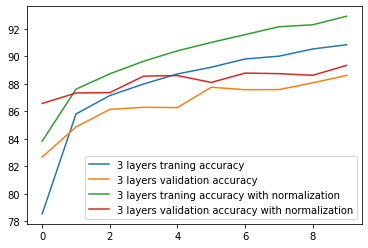

In [ ]:
plt.plot([t/600 for t in train_correct_3], label='3 layers traning accuracy')
plt.plot([t/100 for t in test_correct_3], label='3 layers validation accuracy')
plt.plot([t/600 for t in train_correct], label='3 layers traning accuracy with normalization')
plt.plot([t/100 for t in test_correct], label='3 layers validation accuracy with normalization')
plt.legend()

### E)Regularization

#### 1) L1 Regularization

In [ ]:
hidden_layers = [180, 120, 60]

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers[0], hidden_layers[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers[1], hidden_layers[2]),
    nn.ReLU(),
    nn.Linear(hidden_layers[2], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=180, bias=True)
  (1): ReLU()
  (2): Linear(in_features=180, out_features=120, bias=True)
  (3): ReLU()
  (4): Linear(in_features=120, out_features=60, bias=True)
  (5): ReLU()
  (6): Linear(in_features=60, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses_l1 = []
test_losses_l1 = []
train_correct_l1 = []
test_correct_l1 = []
for e in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for x_train, y_train in trainloader:
        y_pred = model(x_train.view(x_train.shape[0], -1))
        loss = criterion(y_pred, y_train)
        l1_lambda = 0.001
        l1_norm = sum(p.abs().sum()
                  for p in model.parameters())
 
        loss = loss + l1_lambda * l1_norm

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    train_losses_l1.append(loss)
    train_correct_l1.append(trn_corr)

    print(f"epoch {e+1}:")    
    print(f"Train loss: {train_losses_l1[-1].item():10.8f}, Train accuracy: {train_correct_l1[-1].item()/600:.3f}%")

    with torch.no_grad():
        for x_test, y_test in testloader:
            y_val = model(x_test.view(x_test.shape[0], -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses_l1.append(loss)
    test_correct_l1.append(tst_corr)
    print(f"Test loss: {test_losses_l1[-1].item():10.8f}, Test accuracy: {test_correct_l1[-1].item()/100:.3f}%")

epoch 1:
Train loss: 1.22274899, Train accuracy: 62.923%
Test loss: 0.77216190, Test accuracy: 72.940%
epoch 2:
Train loss: 1.03889942, Train accuracy: 75.738%
Test loss: 0.69148886, Test accuracy: 77.180%
epoch 3:
Train loss: 0.84731364, Train accuracy: 78.412%
Test loss: 0.65636051, Test accuracy: 78.180%
epoch 4:
Train loss: 0.86270702, Train accuracy: 79.827%
Test loss: 0.58518380, Test accuracy: 79.190%
epoch 5:
Train loss: 0.93495560, Train accuracy: 80.308%
Test loss: 0.61029744, Test accuracy: 80.040%
epoch 6:
Train loss: 0.77549618, Train accuracy: 80.612%
Test loss: 0.47922608, Test accuracy: 79.700%
epoch 7:
Train loss: 0.86921763, Train accuracy: 81.008%
Test loss: 0.60041088, Test accuracy: 80.630%
epoch 8:
Train loss: 0.67281103, Train accuracy: 80.827%
Test loss: 0.46334934, Test accuracy: 80.870%
epoch 9:
Train loss: 0.76143694, Train accuracy: 81.337%
Test loss: 0.56864178, Test accuracy: 80.580%
epoch 10:
Train loss: 0.66164321, Train accuracy: 81.490%
Test loss: 0.51

#### 2) L2 Regularization

In [ ]:
hidden_layers = [180, 120, 60]

In [ ]:
model = nn.Sequential(
    nn.Linear(input_size, hidden_layers[0]),
    nn.ReLU(),
    nn.Linear(hidden_layers[0], hidden_layers[1]),
    nn.ReLU(),
    nn.Linear(hidden_layers[1], hidden_layers[2]),
    nn.ReLU(),
    nn.Linear(hidden_layers[2], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=180, bias=True)
  (1): ReLU()
  (2): Linear(in_features=180, out_features=120, bias=True)
  (3): ReLU()
  (4): Linear(in_features=120, out_features=60, bias=True)
  (5): ReLU()
  (6): Linear(in_features=60, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses_l2 = []
test_losses_l2 = []
train_correct_l2 = []
test_correct_l2 = []
for e in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for x_train, y_train in trainloader:
        y_pred = model(x_train.view(x_train.shape[0], -1))
        loss = criterion(y_pred, y_train)
        l2_lambda = 0.001
        l2_norm = sum(p.pow(2.0).sum()
                  for p in model.parameters())
 
        loss = loss + l2_lambda * l2_norm

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()

        trn_corr += batch_corr

        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
    train_losses_l2.append(loss)
    train_correct_l2.append(trn_corr)

    print(f"epoch {e+1}:")    
    print(f"Train loss: {train_losses_l2[-1].item():10.8f}, Train accuracy: {train_correct_l2[-1].item()/600:.3f}%")

    with torch.no_grad():
        for x_test, y_test in testloader:
            y_val = model(x_test.view(x_test.shape[0], -1))
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses_l2.append(loss)
    test_correct_l2.append(tst_corr)
    print(f"Test loss: {test_losses_l2[-1].item():10.8f}, Test accuracy: {test_correct_l2[-1].item()/100:.3f}%")

epoch 1:
Train loss: 0.45852375, Train accuracy: 78.030%
Test loss: 0.53499681, Test accuracy: 82.170%
epoch 2:
Train loss: 0.61161774, Train accuracy: 84.170%
Test loss: 0.44215870, Test accuracy: 84.410%
epoch 3:
Train loss: 0.61698580, Train accuracy: 85.425%
Test loss: 0.41284189, Test accuracy: 84.750%
epoch 4:
Train loss: 0.46903914, Train accuracy: 86.095%
Test loss: 0.42654902, Test accuracy: 85.560%
epoch 5:
Train loss: 0.50594568, Train accuracy: 86.562%
Test loss: 0.37762222, Test accuracy: 85.770%
epoch 6:
Train loss: 0.42593479, Train accuracy: 87.130%
Test loss: 0.44115084, Test accuracy: 86.250%
epoch 7:
Train loss: 0.29529285, Train accuracy: 87.342%
Test loss: 0.38935259, Test accuracy: 85.950%
epoch 8:
Train loss: 0.44788432, Train accuracy: 87.443%
Test loss: 0.36271757, Test accuracy: 86.240%
epoch 9:
Train loss: 0.48116857, Train accuracy: 87.723%
Test loss: 0.37498996, Test accuracy: 86.360%
epoch 10:
Train loss: 0.53219068, Train accuracy: 87.830%
Test loss: 0.42

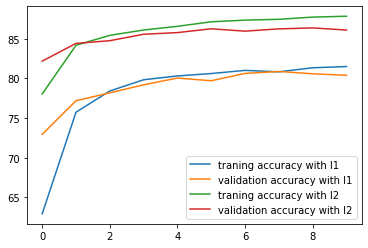

In [ ]:
plt.plot([t/600 for t in train_correct_l1], label='traning accuracy with l1')
plt.plot([t/100 for t in test_correct_l1], label='validation accuracy with l1')
plt.plot([t/600 for t in train_correct_l2], label='traning accuracy with l2')
plt.plot([t/100 for t in test_correct_l2], label='validation accuracy with l2')
plt.legend()

### Visualization
From [towardsdatascience](https://towardsdatascience.com/)

In [ ]:
def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

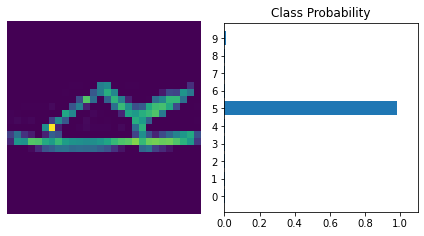

In [ ]:
# Getting the image to test
images, labels = next(iter(trainloader))
# Flatten the image to pass in the model
img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img, ps)